# Random Search, Grid Search

#### parameter 값에 대한 고민
KNN의 경우를 예로 들었음

1. 방법 1(Grid Search)
    - 1~n 구간의 정수를 n_neighbors 값으로 해서 모델 성능 정보 수집
    - 수집된 정보에서 가장 성능 좋은 n_neighbors 값을 찾음
    - 해당 n_neighbors 값을 갖는 KNN 모델을 선언해 학습, 예측, 평가
2. 방법 2(Random Search)
    - 1~n 구간의 정수 중 무작위로 m개 골라 n_neighbors 값으로 해서 모델 성능 수집
    - 수집된 정보에서 가장 성능 좋은 n_neighbors 값 찾음
    - 해당 값을 갖는 KNN 모델을 선언해 학습, 예측, 평가

**2가지 방법 모두 학습 데이터에 대해 가장 좋은 성능을 보인 파라미터 값으로 자동으로 학습함**

#### 파라미터 범위 지정
- 딕셔너리 형태로 파라미터 하나 지정

In [ ]:
# n_neighbors 값이 1 ~ 100까지 설정
param = {'n_neighbors': range(1, 101)}

- 딕셔너리 형태로 파라미터 두 개 지정

In [ ]:
# n_neighbors 100개, metric 2개 -> 200개 조합 만들어짐
param = {'n_neighbors': range(1, 101),
        'metric': ['euclidean', 'manhattan']}

#### 실습 1 -> Random Search

- Random Search로 Decision Tree 알고리즘 모델 튜닝
- Boston 데이터로 모델링

**1. 환경 준비**

In [3]:
# Library 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

In [4]:
# data 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/boston.csv'
data = pd.read_csv(path)

**2. 데이터 확인**

In [5]:
# 상위 5개 행 확인
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
# 기초통계량 확인
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**3. 데이터 준비**

*1) x, y 분리*

In [7]:
# target 확인
target = 'medv'

# x, y 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

*2) train, test 분리*

In [8]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

**4. 성능 예측**

In [9]:
# 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

In [10]:
# 선언하기
model = DecisionTreeRegressor(random_state=1)

In [11]:
# 성능예측
cv_score = cross_val_score(model, x_train, y_train)

In [12]:
# 결과확인
print(cv_score)
print('평균:', cv_score.mean())
print('표준편차', cv_score.std())

[0.65873754 0.49225288 0.78163071 0.80327749 0.82834327]
평균: 0.7128483767547819
표준편차 0.12477007856578752


**5. 모델 튜닝**

*1) 모델 튜닝*

In [14]:
# 파라미터 선언(max_depth : 1~50)
param = {'max_depth': range(1, 51)}

# 기본 모델 선언
model_dt = DecisionTreeRegressor(random_state=1)

# RandomSearch 선언(cv = 5, n_iter = 20, scoring='r2'(Default))
model = RandomizedSearchCV(model_dt,
                           param,
                           cv=5,
                           n_iter=20,
                           scoring='r2')

In [15]:
# 학습하기
model.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
                   n_iter=20, param_distributions={'max_depth': range(1, 51)},
                   scoring='r2')

*2) 결과 확인*
    - model.cv_results_ 속성에 성능 테스트와 관련된 많은 정보 포함

In [18]:
# 중요 정보 확인
print('=' * 80)
print(model.cv_results_['mean_test_score'])
print('-' * 80)
print('최적파라미터:', model.best_params_)
print('-' * 80)
print('최고성능:', model.best_score_)
print('=' * 80)

[0.70905766 0.70563236 0.71284838 0.71284838 0.71284838 0.71284838
 0.71284838 0.74748839 0.71284838 0.71284838 0.71284838 0.71250015
 0.70526236 0.7383174  0.71284838 0.70782307 0.71284838 0.71284838
 0.71284838 0.70622958]
--------------------------------------------------------------------------------
최적파라미터: {'max_depth': 6}
--------------------------------------------------------------------------------
최고성능: 0.7474883885080482


*3) 변수 중요도*

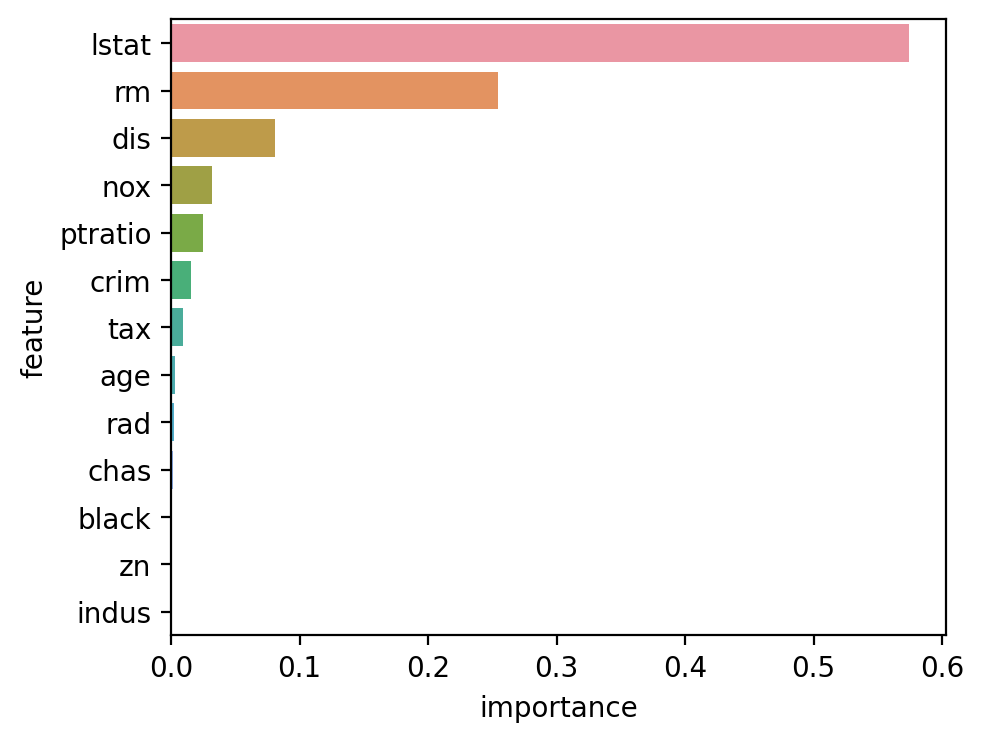

In [19]:
# 데이터 정리
perf_dic = {'feature': list(x), 'importance': model.best_estimator_.feature_importances_}
df = pd.DataFrame(perf_dic)
df.sort_values(by='importance', ascending=False, inplace=True)

# 변수 중요도
plt.figure(figsize=(5, 4))
sns.barplot(x=df['importance'], y=df['feature'])
plt.show()

**6. 성능 평가**

In [21]:
# 예측하기
y_pred = model.predict(x_test)

In [22]:
# 평가하기
print('mae:', mean_absolute_error(y_test, y_pred))
print('r2:', r2_score(y_test, y_pred))

mae: 2.763239793643037
r2: 0.8477248406093285


#### 실습 2 -> Grid Search

- Grid Search로 DT 알고리즘 모델 튜닝
- Boston 데이터로 모델링

**1. 환경 준비**

In [23]:
# Library 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

In [24]:
# data 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/boston.csv'
data = pd.read_csv(path)

**2. 데이터 이해**

In [25]:
# 상위 5개 행 확인
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [26]:
# 기초통계량 확인
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**3. 데이터 준비**

*1) x, y 분리*

In [28]:
# target 확인
target = 'medv'

# x, y 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

*2) train, test 분리*

In [29]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

**4. 성능 예측**

In [30]:
# 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
# 선언하기
model = DecisionTreeRegressor(random_state=1)

In [32]:
# 성능예측
cv_score = cross_val_score(model, x_train, y_train)

In [33]:
# 결과확인
print(cv_score)
print('평가:', cv_score.mean())
print('표준편차:', cv_score.std())

[0.65873754 0.49225288 0.78163071 0.80327749 0.82834327]
평가: 0.7128483767547819
표준편차: 0.12477007856578752


**5. 모델 튜닝**

*1) 모델 튜닝*

In [34]:
# 파라미터 선언(max_depth: 1~50)
param = {'max_depth': range(1, 51)}

In [35]:
# 기본 모델 선언하기
model_dt = DecisionTreeRegressor(random_state=1)

# Random Seaerch 선언(cv=5, scoring='r2)
model = RandomizedSearchCV(model_dt,
                           param,
                           cv=5,
                           scoring='r2')

In [36]:
# 학습하기
model.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
                   param_distributions={'max_depth': range(1, 51)},
                   scoring='r2')

*2) 결과 확인*

In [37]:
print('='*80)
print(model.cv_results_['mean_test_score'])
print('-'*80)
print(model.best_params_)
print('-'*80)
print(model.best_score_)
print('='*80)

[0.74748839 0.70563236 0.71284838 0.71284838 0.71284838 0.71284838
 0.71284838 0.71284838 0.7383174  0.71284838]
--------------------------------------------------------------------------------
{'max_depth': 6}
--------------------------------------------------------------------------------
0.7474883885080482


*3) 변수 중요도*

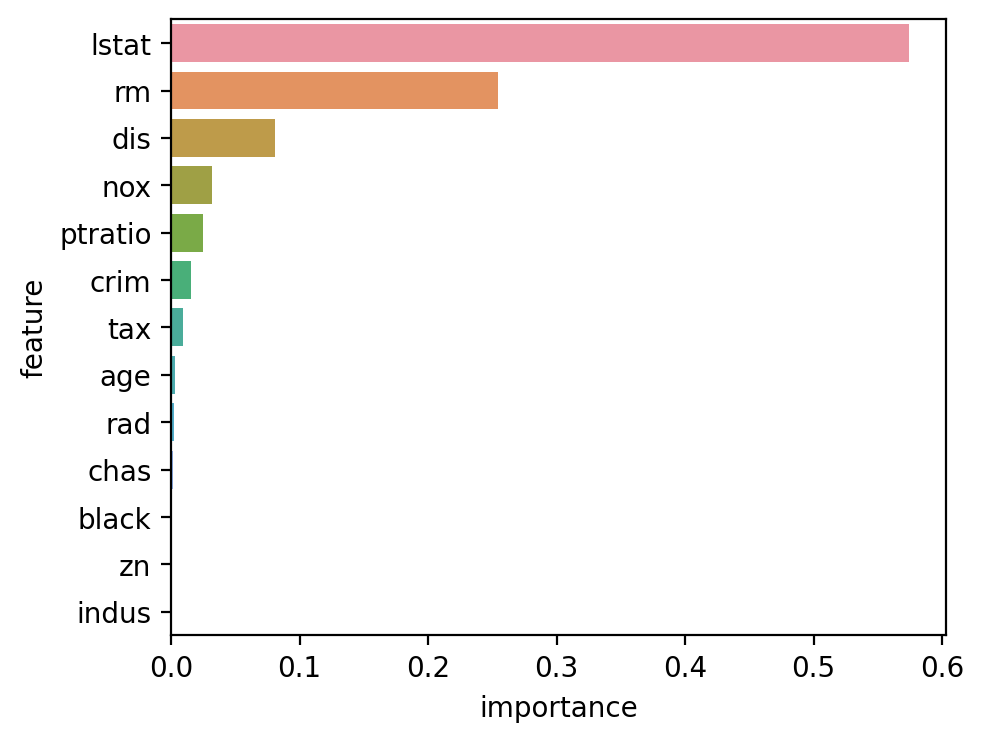

In [38]:
# 변수 정리
perf_dic = {'feature': list(x), 'importance': model.best_estimator_.feature_importances_}
df = pd.DataFrame(perf_dic)
df.sort_values(by='importance', ascending=False, inplace=True)

# 시각화
plt.figure(figsize=(5, 4))
sns.barplot(x=df['importance'], y=df['feature'])
plt.show()

**6. 성능 평가**

In [39]:
# 예측하기
y_pred = model.predict(x_test)

In [40]:
# 평가하기
print('mae:', mean_absolute_error(y_test, y_pred))
print('r2:', r2_score(y_test, y_pred))

mae: 2.763239793643037
r2: 0.8477248406093285
